In [1]:
# Dependencias - EJECUTA ESTA CELDA ANTES DE COMENZAR

# El paquete nnfs incluye la base de datos de entrenamiento que vamos a usar, y asegura que las semillas de los métodos random son consistentes, para que nuestros resultados sean comparables
%pip install -q nnfs
%pip install -q numpy matplotlib

import nnfs
import matplotlib.pyplot as plt
import numpy as np

nnfs.init()

# Esta función la usaremos más adelante para ver los resultados de la red
# works only for model = model = [dense1, activation1, dense2, loss_activation]

def plot_prediction_performance_spiral(
        model: list | tuple,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass through the network
    input = XX_tuples
    for layer in model[:-1]:
        layer.forward(input)
        input = layer.output

    # Assumed last layer is a softmax activation + loss function
    # 'y_true' here is random since it will not be used
    # (only the output of the softmax is needed)
    model[-1].forward(input, y_true=np.array([0]*len(model[-2].output)))

    probabilities_array = model[-1].output
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points,3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c = colors)
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()# print(rgb_colors)  # This will print the RGB color array
    # plt.pcolor(xx, yy, rgb_colors)
    # plt.show()


## Ejercicio 1: Una neurona simple

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=neurona_simple.png&t=04gzB6Klm7RQkH6&scalingup=0" width="250"/>
</div>
</center>

Calcula el output de una neurona simple con cuatro inputs: $[1.0, 2.0, 3.0, 2.5]$, donde los correspondientes pesos son $[0.2, 0.8, -0.5, 1.0]$, y el sesgo es $2.0$.

In [2]:
# SOL EJ 1
inputs = [1.0, 2.0, 3.0, 2.5]
w = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
x = 0

for i in range(0, len(inputs)):
    x += inputs[i] * w[i]

print(x+bias)

4.8


## Ejercicio 2: Una capa de neuronas

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple.png&t=IvPdbEiQJ9gFVxo&scalingup=0" width="250"/>
</div>
</center>

Calcula la salida de una capa de neuronas con cuatro entradas ($[1, 2, 3, 2.5]$) y tres neuronas:
 - Neurona 1: Pesos = $[0.2, 0.8, -0.5, 1]$, Sesgo = $2$
 - Neurona 2: Pesos = $[0.5, -0.91, 0.26, -0.5]$, Sesgo = $3$
 - Neurona 3: Pesos = $[-0.26, -0.27, 0.17, 0.87]$, Sesgo = $0.5$
  
Calcula la salida directamente sobre una lista, calculando para cada elemento las operaciones necesarias entre inputs, pesos y sesgos.


In [3]:
# SOL EJ 2
inputs = [1.0, 2.0, 3.0, 2.5]

weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

output = [
    #Neurona 1
    inputs[0] * weights[0][0] + inputs[1] * weights[0][1] + inputs[2] * weights[0][2] + inputs[3] * weights[0][3] + biases[0],
    #Neurona 2
    inputs[0] * weights[1][0] + inputs[1] * weights[1][1] + inputs[2] * weights[1][2] + inputs[3] * weights[1][3] + biases[1],
    #Neurona 3
    inputs[0] * weights[2][0] + inputs[1] * weights[2][1] + inputs[2] * weights[2][2] + inputs[3] * weights[2][3] + biases[2]
]

output

[4.8, 1.21, 2.385]

# Ejercicio 3: Una capa de neuronas - generalización

Repite el ejercicio 2, pero utiliza un enfoque más general que permita realizar las mismas operaciones por neuronas de forma secuencial (utiliza un bucle ```for```). El formato de datos de entrada ahora es el siguiente:

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

In [5]:
# SOL EJ 3
layer_outputs = []

for neuron_w, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for input, weight in zip(inputs, neuron_w):
        neuron_output += input * weight

    layer_outputs.append(neuron_output + neuron_bias)

layer_outputs

[4.8, 1.21, 2.385]

# Ejercicio 4: Prueba de eficiencia

Copia tu solución anterior, pero ahora utiliza un tamaño creciente de los datos de entrada: $n = [5, 50, 500, 5000]$. Genera listas del tamaño apropiado para los inputs, pesos y sesgos que contengan números aleatorios entre $1$ y $3$ para las entradas y sesgos y entre $-1$ y $1$ para los pesos. Supón distribuciones uniformes. Observa el rendimiento de tu implementación cuando $n$ crece.

In [6]:
# SOL EJ 4
import numpy as np

xd = {}

for n in [5, 50, 500, 5000]:
    inputs = np.random.uniform(1, 3, size=(n,))
    weights = np.random.uniform(-1, 1, size=(n,))
    bias = np.random.uniform(1, 3, size=(n,))

    xd[n] = {"inputs" : inputs, "w":  weights, "b": bias}


## Ejercicio 5: Una neurona simple usando ```numpy```

Reimplementa el ejercicio 1 usando el paquete ```numpy```


In [7]:
# SOL EJ 5
# SOL EJ 1
inputs = np.array([1.0, 2.0, 3.0, 2.5])
w = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

print(np.dot(inputs, w) + bias)

4.799999952316284


## Ejercicio 6: Una capa de neuronas usando ```numpy```

Reimplementa el ejercicio 2 usando el paquete ```numpy```.


In [8]:
import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2.0, 3.0, 0.5])

In [9]:
#SOL EJ 6
layer_outputs = []

for neuron_w, neuron_bias in zip(weights, biases):
    neuron_output = 0
    layer_outputs.append(np.dot(inputs, neuron_w) + neuron_bias)

layer_outputs

[4.799999952316284, 1.2100000381469727, 2.384999990463257]

## Ejercicio 7: Una capa de neuronas con datos en *batch*

Implementa el *forward pass* de una neurona simple asumiendo que la entrada son datos en lote (*batch*). Es decir, la entrada ahora será una matriz, donde cada fila corresponderá a una observación. Por tanto, la salida también será de dimensión 2. Considera los datos dados a continuación:

In [10]:
import numpy as np

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
         [0.5, -0.91, 0.26, -0.5],
         [-0.26, -0.27, 0.17, 0.87]])
bias = np.array([2.0, 3.0, 0.5])

In [11]:
# SOL EJ 7
layer_outputs = []

for input in inputs:
    neuron_output = 0
    for neuron_w, neuron_bias in zip(weights, biases):
        layer_outputs.append(np.dot(input, neuron_w) + neuron_bias)

print(layer_outputs)

## Otra forma
print(np.dot(inputs, weights.T) + bias)

[4.799999952316284, 1.2100000381469727, 2.384999990463257, 8.900000095367432, -1.809999942779541, 0.19999998807907104, 1.4100000262260437, 1.0509999990463257, 0.025999993085861206]
[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


## Ejercicio 8: Red neuronal con una *hidden layer*

Implementa el *forward pass* de una red con la siguiente arquitectura: una capa de entrada (4 inputs), una hidden layer de 3 neuronas y una capa de salida también con 3 neuronas. Utiliza los datos dados a continuación:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=red_simple.png&t=IkHbjPoTjUPoGWt&scalingup=0" width="250"/>
</div>
</center>



In [12]:
import numpy as np

inputs = np.array([
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
])

weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array([2, 3, 0.5])

weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

biases2 = np.array([-1, 2, -0.5])

In [13]:
# SOL EJ 8
capa1 = np.dot(inputs, weights.T) + biases
capa2 = np.dot(capa1, weights2.T) + biases2
capa2

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

## Ejercicio 9: Capa de neuronas usando Programación Orientada a Objetos

Crea una clase llamada ```Layer_Dense```, cuyos parámetros de entrada sean ```n_inputs``` (número de inputs a la capa) y ```n_neurons``` (número de neuronas que contiene la capa). Además, en su constructor deben inicializarse dos variables:
 - ```self.weights```: una matriz que contenga los pesos. Deben inicializarse en números aleatorios entre 0 y 0.01.
 - ```self.biases```: un vector columna que contenga los sesgos. Deben inicializarse en $0$.

Implementa un único método llamado ```forward(self, inputs)``` que, dados unos inputs a la capa, realice el *forward pass*. El resultado debe almacenarse en una variable de la propia clase ```self.output```.

In [14]:
#SOL EJ 9
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.uniform(0, 0.01, (n_inputs, n_neurons))
        self.biases = np.zeros((1, n_neurons))
        self.output = 0

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

n_inputs = 10
n_neuronas = 3
n_capas = 2
input = np.random.uniform(0, 10, n_inputs)
denses = [Layer_Dense(n_inputs, n_neuronas)]

for _ in range(n_capas):
    denses.append(Layer_Dense(n_neuronas, n_neuronas - 1))
    n_neuronas -= 1

denses[0].forward(input)
for i in range(1, len(denses)):
    denses[i].forward(denses[i-1].output)

print(denses[len(denses)-1].output)

[[3.947637e-05]]


## Ejercicio 10: *Forward pass* de datos de entrenamiento — Triple espiral

A continuación se describe un problema de clasificación con tres categorías. La base de datos mostrada abajo ha sido generada a partir de la ecuación de 3 espirales distintas, añadiendo ruido. Se trata de un problema complejo por su alta no-linealidad. Observa toda la base de datos:

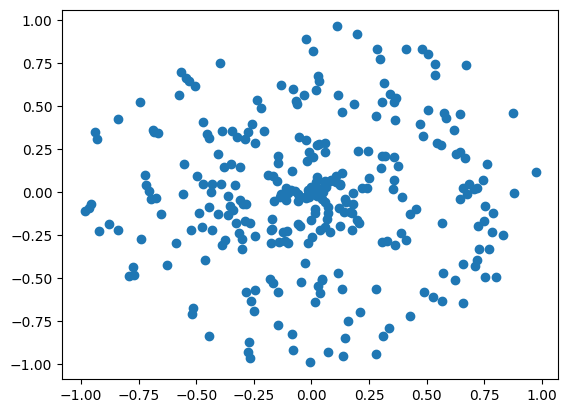

In [15]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Resaltando por colores cada categoría se aprecia mejor su naturaleza:

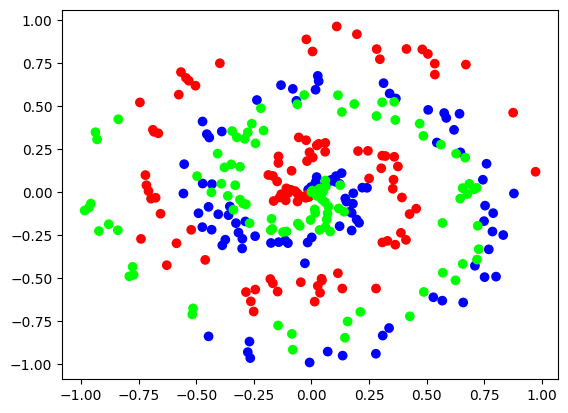

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Realiza un *forward pass* de los datos de entrada ```X``` en la red definida en el ejercicio anterior.

In [17]:
# SOL EJ 10

import nnfs
import numpy as np

# Set seed for reproducibility. Keep this!
nnfs.init()

dense1 = Layer_Dense(2, 3)
dense1.forward(X)

print(dense1.output.shape)

(300, 3)


## Ejercicio 11: Función de activación ReLU

Programa una clase llamada ```Activation_ReLU``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación ReLU a los inputs pasados como argumento.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=relu.png&t=reweQCjpTXGOQZ4&scalingup=0" width="350"/>
</div>
</center>


In [18]:
# SOL EJ 11
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

## Ejercicio 12: Función de activación ```Softmax```
El objetivo de este ejercicio es llegar a una clase llamada ```Activation_Softmax``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación Softmax a los inputs pasados como argumento. En teoría la función Softmax se formula como

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$
siendo los $z_j$ el output de la neurona $j$ (y por tanto, input de la función de activación). El índice $i$ hace referencia a la observación $i$ considerada.

Para conseguir una implementación robusta, haremos alguna modificación en la formulación anterior. Siguie el siguiente proceso:


 - **12.a** Dada una única observación ```layer_outputs = [4.8, 1.21, 2.385]``` (se supone salida de una capa), aplica la función Softmax anterior (de momento, no es necesario que programes ninguna clase).

In [19]:
# SOL EJ 12a
layer_outputs = np.array([4.8, 1.21, 2.385])
soft_output = np.exp(layer_outputs) / np.sum(np.exp(layer_outputs))

soft_output

array([0.89528266, 0.02470831, 0.08000903])

 - **12.b** Dados los siguientes datos en lote, aplica la función Softmax a cada observación.

In [20]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

In [21]:
# SOL EJ 12b
soft_output = np.exp(layer_outputs) / np.sum(np.exp(layer_outputs), axis=1, keepdims=True)
soft_output

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

 - **12.c** En el proceso de exponenciación anterior, resta al input considerado el máximo valor de dicha observación. Esto pretende evitar que los valores se disparen al exponenciar (*exloding values*).


In [22]:
# SOL EJ 12c

 - **12.d** Encapsula el código anterior en una clase ```Activation_Softmax``` que implemente únicamente un método: ```forward(self, inputs)```

In [23]:
# SOL EJ 12d
class Activation_Softmax:
    def forward(self, inputs):
        # En la práctica funciona mejor si restas el valor maximo
        self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)

## Ejercicio 13: *Forward pass* de una red con funciones de activación

Dado un conjunto de datos de entrada $X$, construye una red neuronal que conste de dos capas densas y funciones de activación ReLU y Softmax. El objetivo es realizar un *forward pass* a través de esta red. Los datos de entrada corresponde con los presentados en el ejercicio 10:

In [24]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

La arquitectura de la red debe ser:
 - Input de dos features (las coordenadas de los puntos)
 - Hidden layer, con entrada de 2 valores y salida de 3. Función de activación ReLU.
 - Capa de salida, con entrada de 3 valores y salida también de 3 valores (correspondientes a las tres categorías del problema de clasificación). Función de activación Softmax.

Realiza un forward pass de los datos hasta la última función (softmax) e imprime por pantalla el output para las 5 primeras observaciones. Reutiliza las clases implementadas en ejercicios anteriores.

In [25]:
# SOL EJ 13

# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.3333331 ]
 [0.33333296 0.33333308 0.3333329 ]
 [0.33333254 0.33333266 0.3333323 ]
 [0.33333236 0.33333248 0.33333203]]


## Ejercicio 14: Función de pérdidas — entropía cruzada. Caso particular

Imagina que estamos tratando de clasificar entre las categorías "perro", "gato" o "humano". Un perro es la clase 0 (en el índice 0), un gato la clase 1 (índice 1) y un humano la clase 2 (índice 2). Supongamos que tenemos una arquitectura como la del ejercicio anterior y que tenemos un batch de tres observaciones, que han dado lugar a los siguientes valores de salida en la última capa:

In [26]:
softmax_outputs = np.array(
    [[0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]]
)

Recuerda que estos valroes representan la confianza del modelo en cada clase, para cada observación. Disponemos también de las etiquetas (valores objetivo) para estas tres observaciones: son un perro, un gato y un gato:

In [27]:
class_targets = [0, 1, 1] # perro, gato, gato

La fórmula para calcular la entropía cruzada categórica de *y* (distribución real/deseada) e *y-hat* (distribución predicha) es:
$$
L_i=-\sum_j y_{i, j} \log \left(\hat{y}_{i, j}\right)
$$
donde $L_i$ indica el valor de pérdida de la muestra, $i$ es la muestra $i$-ésima del conjunto, $j$ es la hace referencia al valor $j$-ésimo en la salida, $y$ son los valores objetivo (conocidos de antemano) e $\hat{y}$ son los valores predichos (salida de la red).

Calcula la entropía cruzada categórica para cada observación del batch anterior, así como una media para todo el batch.

In [28]:
# SOL EJ 14

"""
# forma poco genérica
for targ_idx, distribution in zip(class_targets, softmax_outputs):
  print(distribution[targ_idx])

# otra forma menos genérica
print(softmax_outputs[[0, 1, 2], class_targets])
"""

# otra forma más genérica
print(softmax_outputs[[range(len(softmax_outputs))], class_targets])

[[0.7 0.5 0.9]]


## Ejercicio 15: Función de pérdidas — entropía cruzada usando POO

Observa la siguiente clase abstracta:

In [29]:
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

 - **15.a** A partir del ejercicio 14, implementa una clase llamada ```Loss_CategoricalCrossentropy``` que herede de la clase abstracta anterior e implemente el método ```forward```, para el caso de una función de pérdida tipo entropía cruzada categórica.

In [30]:
# SOL EJ 15a
class CategoricalCrossEntropy(Loss):
    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[[range(sample)], y]

        negative_log_probs = -np.log(correct_confidences)

        return negative_log_probs

 - **15.b** Repite el *forward pass* del ejercicio 13, pero incluye el cálculo final de la función de pérdidas usando la implementación anterior

In [31]:
# SOL EJ 15b
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

categorical_entropy1 = CategoricalCrossEntropy()
categorical_entropy1.calculate(activation2.output, y)

1.0986327

 - **15.c** Aunque la pérdida es una métrica útil para optimizar un modelo, hay otra métrica que se suele utilizar en la práctica junto con la pérdida: la *precisión*, que describe con qué frecuencia la mayor confianza corresponde a la clase correcta. Añade al código del apartado 'b' el cálculo de la precisión.

In [32]:
activation2.output.shape

(300, 3)

In [33]:
# SOL EJ 15c
# TODO : Me he perdido, creo que lo que he puesto no es XD
categorical_entropy1 = CategoricalCrossEntropy()
categorical_entropy1.forward(activation2.output, y)[0,:5]

array([1.0986123, 1.0986127, 1.0986124, 1.0986131, 1.0986145],
      dtype=float32)

## Ejercicio 16: Optimización — modificación aleatoria de pesos (I)

Observa los siguientes datos de entrenamiento, que también definen un problema de clasificación multiclase, pero de una naturaleza más sencilla que el de la triple espiral visto hasta ahora

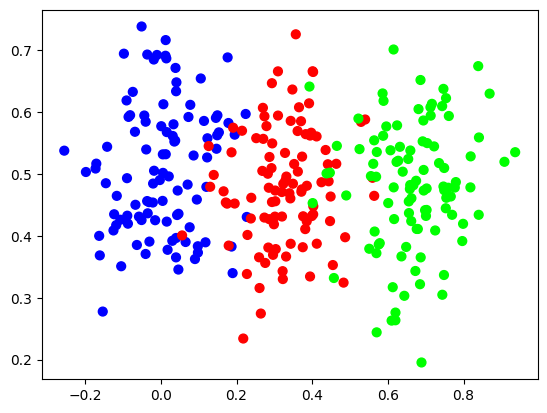

In [34]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()



Utilizando la estructura computacional del ejercicio anterior, realiza un proceso iterativo (máximo 10000 iteraciones) en el que se vayan cambiando los pesos y sesgos de ambas capas de forma aleatoria (distribución normal de media 0 y varianza 0.05). Almacena el resultado que dé lugar a una menor pérdida. Comenta el decrecimiento de la función de pérdidas durante el proceso.

In [35]:
# SOL EJ 16

nnfs.init()

iter = 10000
minor_losses = []

for i in range(0, iter):
    # capa 1
    dense1 = Layer_Dense(2, 3)
    activation1 = Activation_ReLU()

    # capa 2
    dense2 = Layer_Dense(3, 3)
    activation2 = Activation_Softmax()

    # forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # print("---- Iteration", i, "----")
    # print("Result : ", activation2.output[:5])

    min_loss = np.min(categorical_entropy1.forward(activation2.output, y)[0])
    minor_losses.append(min_loss)

    dense2.weights = np.random.uniform(0, 0.05, dense2.weights.shape);
    dense2.biases = np.random.uniform(0, 0.05, dense2.biases.shape);

    dense1.weights = np.random.uniform(0, 0.05, dense1.weights.shape);
    dense1.biases = np.random.uniform(0, 0.05, dense1.biases.shape);

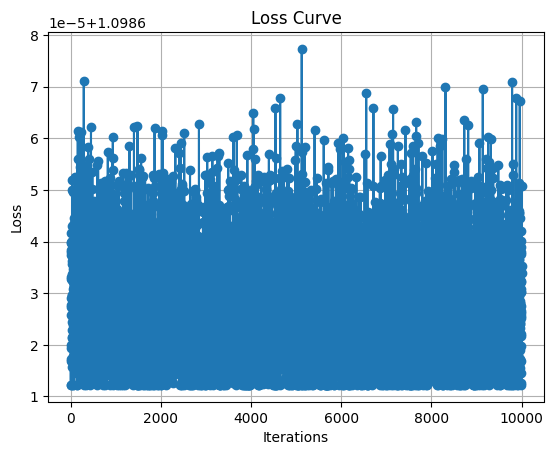

In [36]:
plt.plot(list(range(0, iter)), minor_losses, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Show the plot
plt.show()

## Ejercicio 17: Optimización — modificación aleatoria de pesos (II)

 - **17.a** Repite el ejercicio anterior con un enfoque ligeramente distinto: en lugar de fijar nuevos parámetros elegios al azar en cada iteración, suma una fracción aleatoria (distribución normal de media 0 y varianza 0.05) a los parámetros actuales y comprueba si esos nuevos valores dan lugar a una pérdida menor. Comenta si este enfoque funciona mejor o peor que el anterior.


In [37]:
# SOL EJ 17a
nnfs.init()

iter = 10000
minor_losses = []

for i in range(0, iter):
    # capa 1
    dense1 = Layer_Dense(2, 3)
    activation1 = Activation_ReLU()

    # capa 2
    dense2 = Layer_Dense(3, 3)
    activation2 = Activation_Softmax()

    # forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # print("---- Iteration", i, "----")
    # print("Result : ", activation2.output[:5])

    min_loss = np.min(categorical_entropy1.forward(activation2.output, y)[0])
    minor_losses.append(min_loss)

    dense2.weights = dense2.weights + np.random.uniform(0, 0.05, dense2.weights.shape);
    dense2.biases = dense2.biases + np.random.uniform(0, 0.05, dense2.biases.shape);

    dense1.weights = dense1.weights + np.random.uniform(0, 0.05, dense1.weights.shape);
    dense1.biases = dense1.biases + np.random.uniform(0, 0.05, dense1.biases.shape);

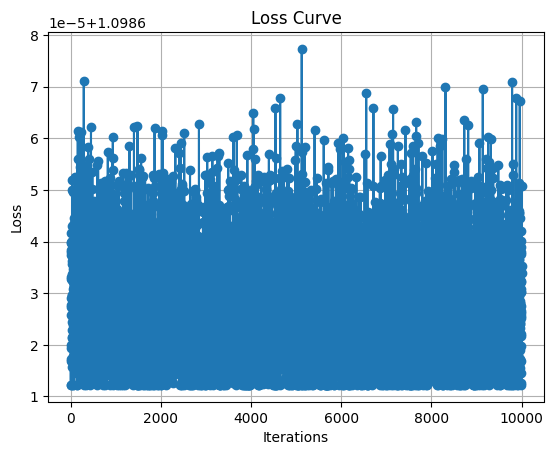

In [38]:
plt.plot(list(range(0, iter)), minor_losses, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Show the plot
plt.show()

El resultado es igual de malo que asignar los valores aleatorios.

 - **17.b** Prueba también este enfoque con los datos de la triple espiral.

In [39]:
# SOL EJ 17b
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

In [40]:
# SOL EJ 17a
nnfs.init()

iter = 10000
minor_losses = []

for i in range(0, iter):
    # capa 1
    dense1 = Layer_Dense(2, 3)
    activation1 = Activation_ReLU()

    # capa 2
    dense2 = Layer_Dense(3, 3)
    activation2 = Activation_Softmax()

    # forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # print("---- Iteration", i, "----")
    # print("Result : ", activation2.output[:5])

    min_loss = np.min(categorical_entropy1.forward(activation2.output, y)[0])
    minor_losses.append(min_loss)

    dense2.weights = dense2.weights + np.random.uniform(0, 0.05, dense2.weights.shape);
    dense2.biases = dense2.biases + np.random.uniform(0, 0.05, dense2.biases.shape);

    dense1.weights = dense1.weights + np.random.uniform(0, 0.05, dense1.weights.shape);
    dense1.biases = dense1.biases + np.random.uniform(0, 0.05, dense1.biases.shape);

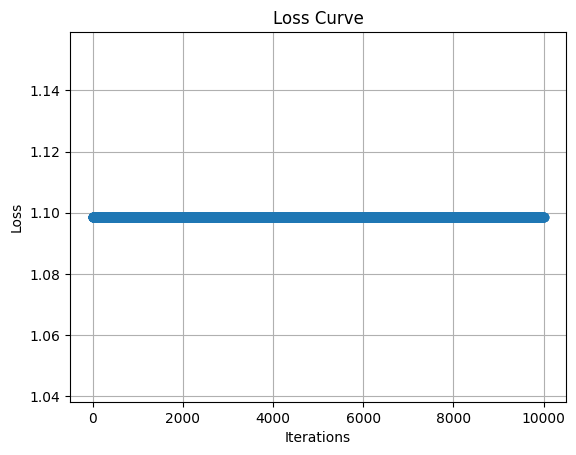

In [41]:
plt.plot(list(range(0, iter)), minor_losses, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Show the plot
plt.show()

En este caso la pérdida se mantiene igual y por tanto la red no ha aprendido nada

## Ejercicio 18: Introducción a la *backpropagation*

La siguiente imagen corresponde a una simple neurona + f. activación, con 3 inputs. Los valores de inputs, pesos y sesgo se han fijado aleatoriamente. En la imagen también se indica en rojo el valor del gradiente recibido de una capa posterior (en este ejemplo, $1$):

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple_gradiente.png&t=nJHrGFJQ8VVuZK7&scalingup=0" width="500"/>
</div>
</center>

Pensemos en esta neurona como una gran función, cuyas variables independientes o parámetros de entrada son los inputs, pesos y sesgo. Esta gran función consiste en varias funciones más simples: hay una multiplicación de inputs y pesos, suma de estos valores y el sesgo, así como una la función activación ReLU - 3 funciones encadenadas en total:
$$
\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)
$$
Para calcular cómo afecta cada variable al resultado, debemos calcular sus derivadas parciales. Como hay varias funciones combinadas, debemos aplicar la regla de la cadena.

Calcula cómo impacta en **el input $x_0$** el gradiente recibido, es decir:

$$
\begin{aligned}
& \frac{\partial}{\partial x_0}\left[\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)\right]
\end{aligned}
$$

In [42]:
# SOL EJ 18
x = np.array([1, -2, 3])
w = np.array([-3, -1, 2])
b = 1
ReLU = Activation_ReLU()

ReLU.forward(np.sum(x*w)+1)
print(ReLU.output)

# Derivative part

if ReLU.output <= 0:
    x[0] = 0
else:
    x[0] = w[0]

print("New x0: ", x[0])

6
New x0:  -3


## Ejercicio 19: Capa densa con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 9, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass (excluyendo la función de activación). El parámetro ```dvalues``` es una matriz donde cada fila se refiere a una observación del batch, y cada elemento de dicha fila es el gradiente llegado de aguas abajo. Dicho método debe calcular los valores ```self.dweights```, ```self.dbiases``` y ```self.dinputs``` que recogen las distintas derivadas parciales para cada parámetro. Presta atención a las dimensiones.

In [43]:
import numpy as np

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.output = None
        self.dweights = None
        self.dbiases = None

    def forward(self, inputs):
        self.inputs = inputs      #### esto de clase no se
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Gradiente de los pesos
        #### AQUI HE CAMBIADO ALGO
        self.dweights = np.dot(self.inputs.T, dvalues)

        # Gradiente de los sesgos
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradiente de los self.output
        self.dinputs = np.dot(dvalues, self.weights.T)

## Ejercicio 20: ReLU con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 11, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.

In [44]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs          #### AQUI HE TOCADO (DE CLASE)
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Inicializar el gradiente de las entradas con ceros
        self.dinputs = dvalues.copy()     ### AQUI HE TOCADO DE CLASE

        # Calcular el gradiente solo donde los valores originales eran mayores que cero
        self.dinputs[self.output <= 0] = 0

## Ejercicio 21: Función de pérdidas con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 15, incluyendo un nuevo método llamado ```backward(self, dvalues, y_true)``` que implemente el backward pass. El parámetro ```dvalues``` son los valores predichos ($\hat{y}_{i,j}$) y ```y_true``` son los valores objetivo. El método debe calcular los valores ```self.dinputs```, el vector derivada respecto a los inputs. Ten en cuenta lo siguiente:
 - Debes convertir los ```y_true``` en *one-hot* vectors.
 - Una vez calcules la derivada según el desarrollo teórico, normaliza el resultado. Esto evitará problemas con muestras grandes en pasos posteriores. Simplemente divide el resultado final por la longitud de la muestra (```len(dvalues)```)

In [45]:
# SOL EJ 21
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class CategoricalCrossEntropy(Loss):
    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[[range(sample)], y]

        negative_log_probs = -np.log(correct_confidences)

        return negative_log_probs

    def backward(self, dvalues, y_true):
        sample = len(dvalues)

        # Create a 2D array with principal diagonal of ones and else 0s
        y_true = np.eye(dvalues.shape[1])[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / sample

## Ejercicio 22: SoftMax con *backpropagation*

Se pretende extender la implementación que hiciste en el ejercicio 12, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.
 - **22a.** Comienza calculando un caso particular. Supón que la salida de la función Softmax ha sido ```softmax_output = [0.7, 0.1, 0.2]```. El resultado debe ser una matriz (el Jacobiano) de dimensión $3x3$.

In [46]:
# SOL 22a
softmax_output = np.array([0.7, 0.1, 0.2])
J = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        if i == j:
            J[i, j] = softmax_output[i] * (1 - softmax_output[i])
        else:
            J[i, j] = -softmax_output[i] * softmax_output[j]

print(J)

[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


 - **22b.** Generaliza el código anterior. Extiende la clase del ejercicio 12 con el método llamado ```backward(self, dvalues)```. A continuación se incluye una plantilla de desarrollo que debe ser completada. Recuerda copiar el resto de métodos de la clase.

In [47]:
# SOL 22b -> complete lines with ######

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create an uninitialized array with the same dimension as dvalues
        self.dinputs = np.empty(dvalues.shape)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array - use 'reshape'
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the output
            matrix = np.zeros(shape=(single_output.shape[0], single_output.shape[0]))
            for i, val in enumerate(single_output):
                matrix[i, i] = val
            jacobian_matrix = matrix - np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)




## Ejercicio 23: Softmax + entropía cruzada

Al calcular juntas las derivadas de la función Softmax y la función de pérdidas de entropía cruzada categórica, los cáluclos se simplifican notablemente. Implementa el método que hace el *backward pass* (i.e. ```backward(self, dvalues, y_true)```) de nueva clase llamada ```Activation_Softmax_Loss_CategoricalCrossentropy``` (el resto de métodos se dan ya implementados). Recuerda normalizar el resultado dividiéndolo por el número de muestras (```len(dvalues)```) para evitar problemas en pasos futuros.

In [48]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self) -> None:
        self.softmax = Activation_Softmax()
        self.loss = CategoricalCrossEntropy()

    def forward(self, inputs, y_true):
        self.softmax.forward(inputs)
        self.output = self.softmax.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, y_hat, y_true):
        samples = len(y_hat)
        self.dinputs = y_hat.copy()

        self.dinputs[range(samples), y_true] -= 1
        self.dinputs /= samples

## Ejercicio 24: Comprobación Softmax + entropía cruzada

Se pretende comprobar si el *backpropagation* combinado (Softmax + entropía cruzada) devuelve los mismos valores en comparación con cuando retropropagamos gradientes a través de ambas funciones por separado. Para este ejemplo, vamos a crear una salida de la función Softmax y algunos valores objetivo. Retropropágalos utilizando ambas soluciones, y comprueba que obtienes los mismos resultados

In [49]:
# SOL EJ 24

import numpy as np
import nnfs

nnfs.init()

# Salida de la función Softmax y valores objetivo
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])

# Retropropagación a través de Softmax y Entropía Cruzada por separado
softmax = Activation_Softmax()
loss = CategoricalCrossEntropy()
loss.backward(softmax_outputs, class_targets)
softmax.output = softmax_outputs
softmax.backward(loss.dinputs)

# Retropropagación combinada
combined_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
combined_loss.backward(softmax_outputs, class_targets)

# Compara los gradientes resultantes
print("Gradientes por separado:")
print(softmax.dinputs)
print("Gradientes combinados:")
print(combined_loss.dinputs)

# Comprueba si los gradientes son iguales o muy cercanos
if np.allclose(softmax.dinputs, combined_loss.dinputs):
    print("\nLos gradientes son iguales.")
else:
    print("\nLos gradientes no son iguales.")


Gradientes por separado:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333332  0.02666667]]
Gradientes combinados:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]

Los gradientes son iguales.


## Ejercicio 25: *Backward pass* de toda la red

Realiza un *backward pass* de la red que usaste en el ejercicio *15b*.

In [50]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
loss = CategoricalCrossEntropy()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
loss.forward(activation2.output, y).shape

(1, 300)

In [51]:
# SOL EJ 25
nnfs.init()

# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=3)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=3, n_neurons=3)
loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X)
relu.forward(dense1.output)

dense2.forward(relu.output)
loss = loss_softmax.forward(dense2.output, y)
print(f"Loss: {loss}")

#Backward
loss_softmax.backward(loss_softmax.output, y)
dense2.backward(loss_softmax.dinputs)
relu.backward(dense2.dinputs)
dense1.backward(relu.dinputs)

print(dense1.dweights)

Loss: 1.0986136198043823
[[-1.5735535e-05  6.1952458e-05  1.4190499e-05]
 [ 7.0554065e-06  1.0230539e-04  8.9116853e-05]]


## Ejercicio 26: Optimizador — Descenso del gradiente

Programa una clase llamada ```Optimizer_SGD``` que implemente el optimizador de descenso de gradiente. Pasa a su constructor un parámetro ```learning_rate``` por defecto de $1$. Dicha clase deberá contener un único método llamado ```update_params(layer)``` al que se le pase una capa y aplique sus correspondientes gradientes a la actualización de sus parámetros.

In [52]:
# SOL EJ 26
class Optimizer_SGD:
    def __init__(self, learning_rate=1.0):
        # Establecer la tasa de aprendizaje
        self.learning_rate = learning_rate

    def update_params(self, layer):
        # Actualizar los pesos y sesgos de la capa usando SGD
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

## Ejercicio 27: Optimización sobre el caso de la triple espiral

Partiendo del código al que llegaste en el ejercicio 25, añade un optimizador que actualice los parámetros de la red. Realiza 10000 iteraciones (*epoch*). Observa como evoluciona la precisión y las pérdidas a lo largo del entrenamiento.


En adelante, utiliza una arquitectura con 64 neuronas por capa.

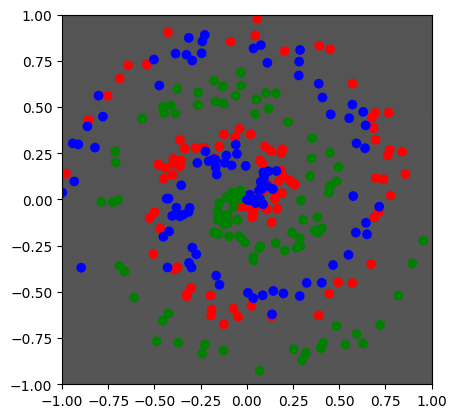

In [53]:
#SOL 27

#Implementa aquí la red neuronal
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)
# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las distintas
#  capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Streaming output truncated to the last 5000 lines.
Loss: 1.0770878791809082
Loss: 1.0847994089126587
Loss: 1.076910138130188
Loss: 1.0850708484649658
Loss: 1.0769871473312378
Loss: 1.084894061088562
Loss: 1.0769758224487305
Loss: 1.0852186679840088
Loss: 1.0770766735076904
Loss: 1.0848028659820557
Loss: 1.0768818855285645
Loss: 1.0850553512573242
Loss: 1.0769551992416382
Loss: 1.0848755836486816
Loss: 1.0769456624984741
Loss: 1.0852065086364746
Loss: 1.0770537853240967
Loss: 1.0848021507263184
Loss: 1.0768674612045288
Loss: 1.0850661993026733
Loss: 1.0769485235214233
Loss: 1.0848969221115112
Loss: 1.0769455432891846
Loss: 1.0852361917495728
Loss: 1.077057957649231
Loss: 1.0848376750946045
Loss: 1.0768752098083496
Loss: 1.0851049423217773
Loss: 1.0765749216079712
Loss: 1.0842690467834473
Loss: 1.0767147541046143
Loss: 1.085046648979187
Loss: 1.077025294303894
Loss: 1.0849220752716064
Loss: 1.0769708156585693
Loss: 1.0853428840637207
Loss: 1.0771149396896362
Loss: 1.085236668586731
Loss:

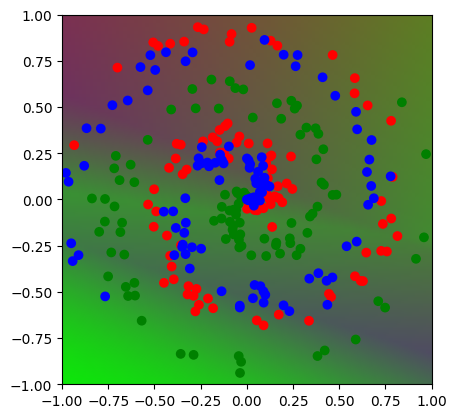

In [54]:
# SOL EJ 25 OTRA
nnfs.init()
X, y = spiral_data(samples=100, classes=3)

# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=3)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=3, n_neurons=3)
loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.update_params(dense1)
  optimizer.update_params(dense2)

model = [dense1, relu, dense2, loss_softmax]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

# Ejercicio 28: Misma solución utilizando ```keras```

Busca documentación sobre cómo implementar redes neuronales con el módulo ```tf.keras``` (echa un vistazo por ejemplo a [este enlace](https://stackoverflow.com/questions/64689483/how-to-do-multiclass-classification-with-keras), o [este otro](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)). Crear una arquitectura similar a la usada en el ejercicio anterior, directamente usando las herramientas disponibles en dicho paquete.

In [55]:
%pip install -q tensorflow

In [56]:
# SOL EJ 28
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from nnfs.datasets import spiral_data
from sklearn.model_selection import train_test_split

X, y = spiral_data(samples=100, classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# create model
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

#es = EarlyStopping(monitor='loss', min_delta=0.005, patience=1, verbose=1, mode='auto')
model.fit(X_train, y_train, epochs = 100, shuffle = True, batch_size=128, verbose=2, validation_split=0.2)

scores = model.evaluate(X_test, y_test)
print(model.metrics_names[0], model.metrics_names[1])

Epoch 1/100
2/2 - 1s - loss: 1.1048 - accuracy: 0.3500 - val_loss: 1.1154 - val_accuracy: 0.3415 - 891ms/epoch - 446ms/step
Epoch 2/100
2/2 - 0s - loss: 1.1044 - accuracy: 0.3375 - val_loss: 1.1147 - val_accuracy: 0.3415 - 100ms/epoch - 50ms/step
Epoch 3/100
2/2 - 0s - loss: 1.1040 - accuracy: 0.3438 - val_loss: 1.1141 - val_accuracy: 0.3415 - 70ms/epoch - 35ms/step
Epoch 4/100
2/2 - 0s - loss: 1.1036 - accuracy: 0.3500 - val_loss: 1.1134 - val_accuracy: 0.3171 - 73ms/epoch - 37ms/step
Epoch 5/100
2/2 - 0s - loss: 1.1033 - accuracy: 0.3938 - val_loss: 1.1127 - val_accuracy: 0.3171 - 51ms/epoch - 25ms/step
Epoch 6/100
2/2 - 0s - loss: 1.1029 - accuracy: 0.3938 - val_loss: 1.1121 - val_accuracy: 0.3171 - 105ms/epoch - 52ms/step
Epoch 7/100
2/2 - 0s - loss: 1.1025 - accuracy: 0.3938 - val_loss: 1.1114 - val_accuracy: 0.3171 - 47ms/epoch - 24ms/step
Epoch 8/100
2/2 - 0s - loss: 1.1023 - accuracy: 0.3938 - val_loss: 1.1108 - val_accuracy: 0.3171 - 63ms/epoch - 31ms/step
Epoch 9/100
2/2 - 0s

## <font color='red'>[24 de octubre] Antes de empezar, copia el contenido completo de este notebook a continuación del de la semana pasada. Necesitarás reutilizar código de allí. </font>

Para la entrega, basta con entregar ese notebook que incluirá las actividades de ambas semanas

## Ejercicio 29: *Learning rate decay*

 - **29.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 26 para que incluya un mecanismo que aplique el decaimiento de la tasa de aprendizaje. Ahora, además del argumento ```learning_rate```, el constructor de la clase recibirá el ```decay```. En dicho constructor, inicializa también dos variables adicionales: ```self.current_learning_rate``` (para ir almacenando el *learning rate* en sucesivas iteraciones) y ```self.iterations``` (para ir almacenando el número de iteraciones). Actualiza el método ```update_params``` e implementa dos nuevos métodos:
   - ```pre_update_params(self)```: responsable de actualizar ```self.current_learning_rate```. Está pensado para será ejecutado justo antes de la llamada a ```update_params```.
   - ```post_update_params(self)```: responsable de actualizar ```self.iterations```. Está pensado para será ejecutado justo después de la llamada a ```update_params```.


In [57]:
# SOL EJ 29a

class Optimizer_SGD:
    def __init__(self, learning_rate=1.0, decay=0.0):
        # Establecer la tasa de aprendizaje
        self.decay = decay
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.iterations = 0

    def pre_update_params(self):
      if self.decay:
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        # Actualizar los pesos y sesgos de la capa usando SGD
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

    def post_update_params(self):
      self.iterations += 1

---
  - **29.b** Partiendo del código al que llegaste en el ejercicio 27, prueba el mecanismo de *Learning rate decay* que acabas de implementar. Experimenta con un *decay* de $10^{-2}$ y de $10^{-3}$ ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 27? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Streaming output truncated to the last 5000 lines.
Loss: 0.9731101393699646
Loss: 0.9609196186065674
Loss: 0.9742499589920044
Loss: 0.9688311815261841
Loss: 0.9733931422233582
Loss: 0.9759976267814636
Loss: 0.9702404737472534
Loss: 0.9829331636428833
Loss: 0.9673189520835876
Loss: 0.9853875637054443
Loss: 0.9633852243423462
Loss: 0.9851824045181274
Loss: 0.9588016867637634
Loss: 0.9829787015914917
Loss: 0.9555342793464661
Loss: 0.9811244606971741
Loss: 0.9536144137382507
Loss: 0.9794878959655762
Loss: 0.9547373652458191
Loss: 0.9801166653633118
Loss: 0.962563693523407
Loss: 0.9833150506019592
Loss: 0.9788232445716858
Loss: 0.9873203635215759
Loss: 1.0019742250442505
Loss: 0.9882203340530396
Loss: 1.0183062553405762
Loss: 0.9845589399337769
Loss: 1.0188722610473633
Loss: 0.9807416796684265
Loss: 1.0132883787155151
Loss: 0.9760715961456299
Loss: 1.004591703414917
Loss: 0.9719581007957458
Loss: 0.996594250202179
Loss: 0.969082236289978
Loss: 0.9888314008712769
Loss: 0.9652493000030518
Los

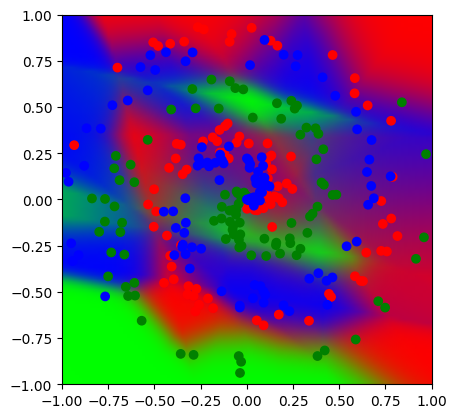

In [58]:
# SOL EJ 29b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)
loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_softmax]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 30: Descenso de gradiente con momentum

 - **30.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 29 para que incluya el mecanismo de *momentum*. Sigue la siguiente plantilla de desarrollo:

In [59]:
# SOL EJ 30a -> completa las líneas con ######

# SGD optimizer con momentum
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if self.momentum:

            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

Streaming output truncated to the last 5000 lines.
Loss: 0.9731101393699646
Loss: 0.9609196186065674
Loss: 0.9742499589920044
Loss: 0.9688311815261841
Loss: 0.9733931422233582
Loss: 0.9759976267814636
Loss: 0.9702404737472534
Loss: 0.9829331636428833
Loss: 0.9673189520835876
Loss: 0.9853875637054443
Loss: 0.9633852243423462
Loss: 0.9851824045181274
Loss: 0.9588016867637634
Loss: 0.9829787015914917
Loss: 0.9555342793464661
Loss: 0.9811244606971741
Loss: 0.9536144137382507
Loss: 0.9794878959655762
Loss: 0.9547373652458191
Loss: 0.9801166653633118
Loss: 0.962563693523407
Loss: 0.9833150506019592
Loss: 0.9788232445716858
Loss: 0.9873203635215759
Loss: 1.0019742250442505
Loss: 0.9882203340530396
Loss: 1.0183062553405762
Loss: 0.9845589399337769
Loss: 1.0188722610473633
Loss: 0.9807416796684265
Loss: 1.0132883787155151
Loss: 0.9760715961456299
Loss: 1.004591703414917
Loss: 0.9719581007957458
Loss: 0.996594250202179
Loss: 0.969082236289978
Loss: 0.9888314008712769
Loss: 0.9652493000030518
Los

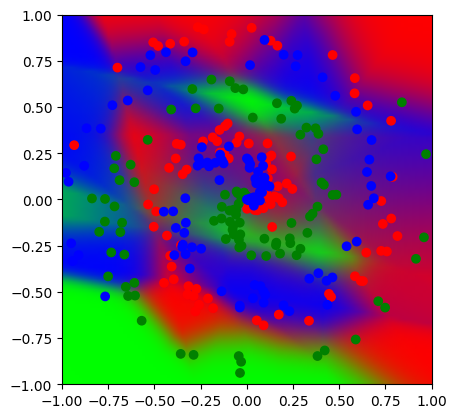

In [60]:
# SOL EJ 29b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()


optimizer = Optimizer_SGD()

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

  - **30.b** Partiendo del código al que llegaste en el ejercicio 29, prueba el mecanismo de momentum que acabas de implementar. Probar con un *decay* de $10^{-3}$ y un *momentum* de $0.5$ y luego de $0.9$. ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 29? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Streaming output truncated to the last 5000 lines.
Loss: 0.744621217250824
Loss: 0.7348706126213074
Loss: 0.7475175261497498
Loss: 0.7374345660209656
Loss: 0.7491350173950195
Loss: 0.7359843850135803
Loss: 0.7457343935966492
Loss: 0.7336955666542053
Loss: 0.7440073490142822
Loss: 0.7327725291252136
Loss: 0.7437209486961365
Loss: 0.7327954173088074
Loss: 0.7445470094680786
Loss: 0.7329835295677185
Loss: 0.7443934679031372
Loss: 0.7323367595672607
Loss: 0.7453402280807495
Loss: 0.7341395616531372
Loss: 0.7466761469841003
Loss: 0.7326337695121765
Loss: 0.7435588240623474
Loss: 0.7313358187675476
Loss: 0.7430902123451233
Loss: 0.730587899684906
Loss: 0.7424923777580261
Loss: 0.7286970019340515
Loss: 0.7403285503387451
Loss: 0.7279804348945618
Loss: 0.741023063659668
Loss: 0.7287703156471252
Loss: 0.7432717680931091
Loss: 0.7291313409805298
Loss: 0.7431506514549255
Loss: 0.727154016494751
Loss: 0.7399531006813049
Loss: 0.7252668142318726
Loss: 0.7389715313911438
Loss: 0.72490394115448
Loss:

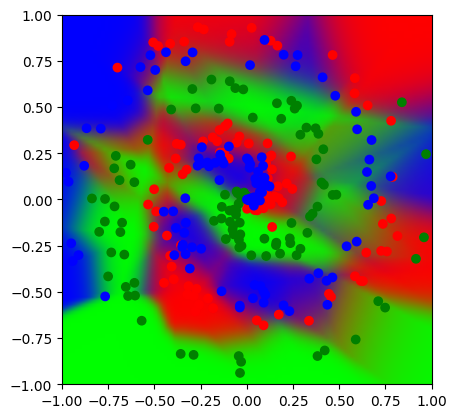

In [61]:
# SOL EJ 30b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(momentum=0.5, decay=1e-3)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Streaming output truncated to the last 5000 lines.
Loss: 0.1451280266046524
Loss: 0.14511285722255707
Loss: 0.14511562883853912
Loss: 0.145095095038414
Loss: 0.14509578049182892
Loss: 0.14509107172489166
Loss: 0.14509567618370056
Loss: 0.14506690204143524
Loss: 0.14506451785564423
Loss: 0.14504796266555786
Loss: 0.14504654705524445
Loss: 0.14503778517246246
Loss: 0.14501909911632538
Loss: 0.1450079083442688
Loss: 0.1449788361787796
Loss: 0.14498527348041534
Loss: 0.14498867094516754
Loss: 0.14496682584285736
Loss: 0.14494125545024872
Loss: 0.14496782422065735
Loss: 0.14497357606887817
Loss: 0.14498907327651978
Loss: 0.1449349969625473
Loss: 0.1449214369058609
Loss: 0.14490264654159546
Loss: 0.14488224685192108
Loss: 0.14490438997745514
Loss: 0.1449030190706253
Loss: 0.1448824554681778
Loss: 0.14486297965049744
Loss: 0.14484858512878418
Loss: 0.1448192447423935
Loss: 0.14483146369457245
Loss: 0.1448141187429428
Loss: 0.14479728043079376
Loss: 0.14479555189609528
Loss: 0.1447925120592117

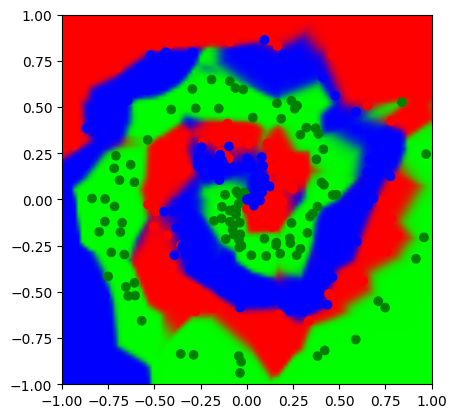

In [62]:
# SOL EJ 30b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(momentum=0.9, decay=1e-3)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 31: RMS Prop

 - **31.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_RMSprop``` que implemente este optimizador. RMSProp utiliza una media móvil del caché:

    ```python
    cache = rho * cache + (1 - rho) * gradient ** 2
    ```

    Que luego se usará en la actualización de cada parámetro individual como:

    ```python
    parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
    ```
    Sigue la siguiente plantilla de desarrollo:

In [63]:
# SOL EJ 31a -> completa las líneas con ######

# RMSprop with momentum
class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters using RMSprop with momentum
    def update_params(self, layer):
        # If cache arrays don't exist, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * (layer.dweights ** 2) ######
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * (layer.dbiases ** 2) ######

        # Update weights and biases using RMSprop with momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache + self.epsilon)) ######
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache + self.epsilon)) ######

    def post_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        self.iterations += 1


  - **31.b** Partiendo del código al que llegaste en el ejercicio 30, prueba el optimizador que acabas de implementar. Prueba primero con un *decay* de $10^{-4}$ y el resto de parámetros por defecto. Prueba luego con ```learning_rate=0.02, decay=1e-5, rho=0.999``` ¿Se consigue mejorar los resultados en comparación con los del ejercicio 30? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Streaming output truncated to the last 5000 lines.
Loss: 0.7670097947120667
Loss: 0.7669428586959839
Loss: 0.766823947429657
Loss: 0.7667407989501953
Loss: 0.7666991949081421
Loss: 0.7666605710983276
Loss: 0.7665973901748657
Loss: 0.7665374875068665
Loss: 0.7664687037467957
Loss: 0.7663998007774353
Loss: 0.7663543224334717
Loss: 0.7663155794143677
Loss: 0.766278862953186
Loss: 0.7662593722343445
Loss: 0.7662519216537476
Loss: 0.7662795782089233
Loss: 0.7663218379020691
Loss: 0.7663605809211731
Loss: 0.7663432359695435
Loss: 0.7662742733955383
Loss: 0.766162633895874
Loss: 0.7660704255104065
Loss: 0.7660184502601624
Loss: 0.7659748196601868
Loss: 0.7659584283828735
Loss: 0.7659390568733215
Loss: 0.7658868432044983
Loss: 0.7658128142356873
Loss: 0.7657399773597717
Loss: 0.7656795978546143
Loss: 0.7656355500221252
Loss: 0.7656003832817078
Loss: 0.7655596733093262
Loss: 0.7655447721481323
Loss: 0.7655430436134338
Loss: 0.7655901312828064
Loss: 0.7656757831573486
Loss: 0.7657511830329895
Lo

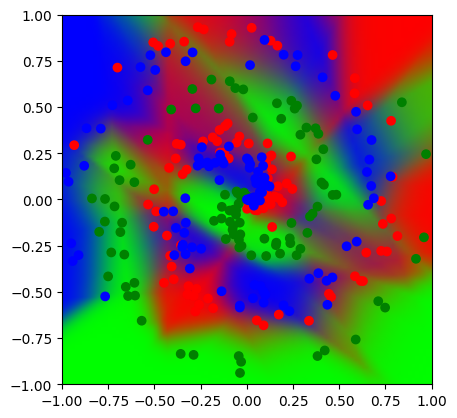

In [64]:
# SOL EJ 31b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(decay=1e-4)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Streaming output truncated to the last 5000 lines.
Loss: 0.7973239421844482
Loss: 0.7969059348106384
Loss: 0.7972339987754822
Loss: 0.796798050403595
Loss: 0.7974178791046143
Loss: 0.7971053123474121
Loss: 0.7977757453918457
Loss: 0.7972807288169861
Loss: 0.7979432940483093
Loss: 0.7973127961158752
Loss: 0.7979999780654907
Loss: 0.7976224422454834
Loss: 0.7982523441314697
Loss: 0.7975195050239563
Loss: 0.7981225252151489
Loss: 0.7974362969398499
Loss: 0.7975127100944519
Loss: 0.7970408797264099
Loss: 0.7975455522537231
Loss: 0.796990156173706
Loss: 0.7972546815872192
Loss: 0.7966181039810181
Loss: 0.7966514229774475
Loss: 0.796347975730896
Loss: 0.7967234253883362
Loss: 0.7961743474006653
Loss: 0.7962223291397095
Loss: 0.7958805561065674
Loss: 0.7961397171020508
Loss: 0.7958940863609314
Loss: 0.7959831953048706
Loss: 0.7957232594490051
Loss: 0.7957963347434998
Loss: 0.795649528503418
Loss: 0.7959823608398438
Loss: 0.7957733869552612
Loss: 0.7958461046218872
Loss: 0.7957686185836792
Los

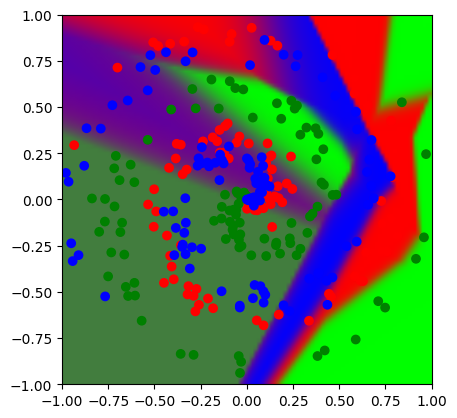

In [65]:
# SOL EJ 31b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5, rho=0.999)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 32: Adam

 - **32.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_Adam``` que implemente este optimizador. Adam añade a RMSProp el mecanismo de momentum ($\beta_1$). También añade además un mecanismo de corrección de sesgo, dividiendo tanto el momentum como el caché por $1-\beta_1^{step}$.

In [66]:
# SOL EJ 32a -> completa las líneas con ######

# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1  # momentum, and for the correction described above
        self.beta_2 = beta_2  # rename the old rho of RMSProp -> used for the cache

    def pre_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))


    def update_params(self, layer):

        if not hasattr(layer, 'weight_momentums'):  # Fixed the attribute name from 'weight_cache' to 'weight_momentums'
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_2 * layer.bias_momentums + (1 - self.beta_2) * (layer.dbiases ** 2)

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_2 ** (self.iterations + 1))
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_1 ** (self.iterations + 1))  # Fixed attribute name from 'dweights' to 'weight_cache'
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))  # Fixed attribute name from 'dbiases' to 'bias_cache'

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected + self.epsilon))
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected + self.epsilon))

        layer.weight_cache = self.beta_1 * layer.weight_cache + (1 - self.beta_1) * (layer.dweights ** 2)
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * (layer.dbiases ** 2)

    def post_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        self.iterations += 1

  - **32.b** Partiendo del código al que llegaste en el ejercicio 31, prueba el optimizador que acabas de implementar. Prueba primero con ```Optimizer_Adam(learning_rate=0.02, decay=1e-5)```, y luego con ```Optimizer_Adam(learning_rate=0.05, decay=5e-7)```. ¿Se consigue mejorar los resultados en comparación con los del ejercicio 31? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Streaming output truncated to the last 5000 lines.
Loss: 0.3036198914051056
Loss: 0.304641991853714
Loss: 0.30463317036628723
Loss: 0.30171144008636475
Loss: 0.3024758994579315
Loss: 0.30232003331184387
Loss: 0.3016665279865265
Loss: 0.3022007346153259
Loss: 0.3016083538532257
Loss: 0.3016434609889984
Loss: 0.301646888256073
Loss: 0.30132734775543213
Loss: 0.3012336790561676
Loss: 0.3015444576740265
Loss: 0.3009195327758789
Loss: 0.3008743226528168
Loss: 0.30097511410713196
Loss: 0.3007084131240845
Loss: 0.3006603419780731
Loss: 0.3003360629081726
Loss: 0.30024150013923645
Loss: 0.3003935217857361
Loss: 0.30059584975242615
Loss: 0.3013032376766205
Loss: 0.3019064962863922
Loss: 0.30399736762046814
Loss: 0.30790165066719055
Loss: 0.3019162118434906
Loss: 0.30220863223075867
Loss: 0.3008005917072296
Loss: 0.3019600510597229
Loss: 0.30010703206062317
Loss: 0.30172479152679443
Loss: 0.29983437061309814
Loss: 0.3012710213661194
Loss: 0.29971766471862793
Loss: 0.30072906613349915
Loss: 0.299

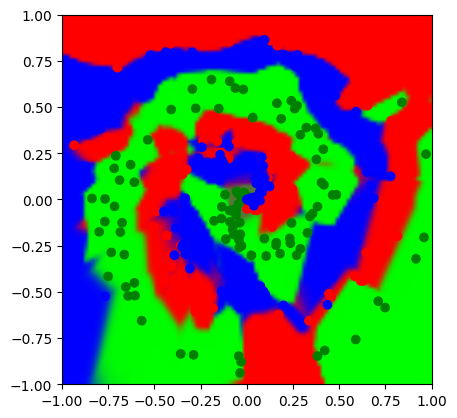

In [67]:
# SOL EJ 32b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Streaming output truncated to the last 5000 lines.
Loss: 0.30476999282836914
Loss: 0.30450257658958435
Loss: 0.3044624924659729
Loss: 0.30436626076698303
Loss: 0.30422598123550415
Loss: 0.3040524423122406
Loss: 0.30385029315948486
Loss: 0.30357611179351807
Loss: 0.30326294898986816
Loss: 0.3030126094818115
Loss: 0.30272984504699707
Loss: 0.3027452826499939
Loss: 0.3033711612224579
Loss: 0.3031711280345917
Loss: 0.3015451729297638
Loss: 0.3017476797103882
Loss: 0.3008795976638794
Loss: 0.3010762333869934
Loss: 0.3003922402858734
Loss: 0.30041471123695374
Loss: 0.3000257611274719
Loss: 0.299808531999588
Loss: 0.2995225191116333
Loss: 0.29936954379081726
Loss: 0.2990197241306305
Loss: 0.2988729774951935
Loss: 0.29860350489616394
Loss: 0.29840582609176636
Loss: 0.29804885387420654
Loss: 0.2979288101196289
Loss: 0.29758042097091675
Loss: 0.29744642972946167
Loss: 0.2971116304397583
Loss: 0.2969515323638916
Loss: 0.2967303991317749
Loss: 0.2964400351047516
Loss: 0.29623404145240784
Loss: 0.2

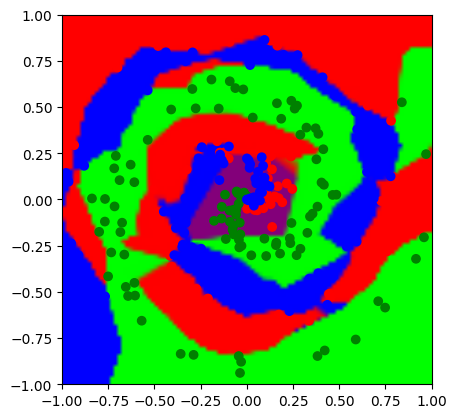

In [68]:
# SOL EJ 32b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

 - **32.c** Interpreta los resultados que acabas de obtener. ¿Crees que la red ha aprendido correctamente la naturaleza de los datos de entrenamiento? Si no es así, investiga qué puede estar pasando y discute posibles soluciones (no es necesario implementar nada).

In [69]:
# SOL EJ 32c


## Ejercicio 33: Regresión lineal

La estructura computacional que has creado permite abordar diversos problemas. En particular, permite por ejemplo obtener regresiones lineal múltiples con facilidad. En este ejercicio, calcularemos una. Trabajaremos con la base de datos ```diabetes```, contenida en ```sklearn```. Puedes cargar estos datos ejecutando la siguiente celda:

In [70]:
#%pip install -q scikit-learn
from sklearn import datasets

diabetes = datasets.load_diabetes()

X = diabetes['data']
y = diabetes['target'].reshape(-1, 1)  # Target Variable (y): A quantitative measure of disease progression one year after baseline.

10

Ahora, sigue el siguiente proceso para obtener la regresión multilineal que ajuste los datos:
 - **33.a** Las técnicas de regresión minimizan el error cuadrático medio. Programa una clase ```Loss_MeanSquaredError``` que implemente esta función de pérdidas. Recuerda implementar los métodos ```forward(self, y_pred, y_true)``` y ```backward(self, y_pred, y_true)```.


In [124]:
# SOL EJ 33a
class Loss_MeanSquaredError():
    # Forward pass
    def forward(self, y_pred, y_true):
        self.output = ((y_pred - y_true) ** 2).mean()

    # Backward pass
    def backward(self, y_pred, y_true):
        N = len(y_true)
        self.dinputs = 2 * (y_pred - y_true) / N

 - **33.b** Crea una red con la siguiente arquitectura:
    - Una única capa con ```n_inputs``` igual al número de variables predictoras y una única neurona. Sin función de activación (=función de activación lineal).
    - $MSE$ como función de pérdidas.
    - Optimizador de descenso de gradiente sin momentum ni *decay*. Comienza usando un *learning rate* de $0.05$.

In [131]:
# SOL EJ 33b

# Forward
dense1 = Layer_Dense(n_inputs=X.shape[1], n_neurons=1)
loss_RMSE = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=.05)

dense1.forward(X)
loss_RMSE.forward(dense1.output, y)

print(f"Loss: {loss_RMSE.output}")
#Backward
loss_RMSE.backward(dense1.output, y)
dense1.backward(loss_RMSE.dinputs)

optimizer.pre_update_params()
optimizer.update_params(dense1)
optimizer.post_update_params()

Loss: 29074.49262781973


: - **33.c** Realiza el entrenamiento en $10000$ *epochs*. Comprueba que las pérdidas medias se van reduciendo.

Streaming output truncated to the last 5000 lines.
Loss: 3010.151097218467
Loss: 3010.0964506143373
Loss: 3010.041853247128
Loss: 3009.9871665396395
Loss: 3009.932657578783
Loss: 3009.8781398053143
Loss: 3009.823624301749
Loss: 3009.7690950159545
Loss: 3009.714606072245
Loss: 3009.660135191055
Loss: 3009.605759755783
Loss: 3009.5513049553624
Loss: 3009.4969759821406
Loss: 3009.4426482475374
Loss: 3009.388234027055
Loss: 3009.3339347092865
Loss: 3009.2796829633903
Loss: 3009.2254486617926
Loss: 3009.1712375413726
Loss: 3009.11701507141
Loss: 3009.062865838302
Loss: 3009.0086668904846
Loss: 3008.9545405041395
Loss: 3008.900472916829
Loss: 3008.8464124829466
Loss: 3008.7923071159476
Loss: 3008.738278804071
Loss: 3008.684273960704
Loss: 3008.630304220847
Loss: 3008.576372600723
Loss: 3008.5224133799225
Loss: 3008.4685226910087
Loss: 3008.4146373959024
Loss: 3008.360741866552
Loss: 3008.3069260862053
Loss: 3008.253102903406
Loss: 3008.1993219777305
Loss: 3008.145554720911
Loss: 3008.0918443

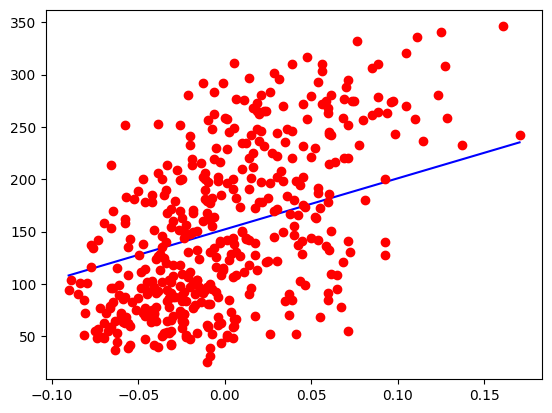

In [130]:
# Sol EJ 33c
# ...

# SOL EJ 33b

# Forward
dense1 = Layer_Dense(n_inputs=X.shape[1], n_neurons=1)
loss_RMSE = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=.05)

for epoch in range(10000):
  dense1.forward(X)
  loss_RMSE.forward(dense1.output, y)

  print(f"Loss: {loss_RMSE.output}")
  #Backward
  loss_RMSE.backward(dense1.output, y)
  dense1.backward(loss_RMSE.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.post_update_params()


#Comprueba también que la función obtenida sigue la tendencia lineal de los datos en alguna de las variables. Puedes adaptar el siguiente bloque de código para hacerlo
var_num = 2

x_points = np.linspace(min(X[:, np.newaxis, var_num]), max(X[:, np.newaxis, var_num]), 100)
y_points = dense1.biases.flatten() + dense1.weights[var_num] * x_points

plt.plot(x_points, y_points, 'b')
plt.plot(X[:, np.newaxis, var_num], y, 'ro')